In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.style.use('seaborn-notebook')

In [4]:
os.chdir('sample_data')
df = pd.read_csv('fraudData.csv',index_col=None)
print(df.shape)
df.sample(3)

(7175, 12)


,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4848,4848,262,PAYMENT,1427.50,C1728471215,0.0,0.00,M186179212,0.0,0.0,0,0
554,554,187,PAYMENT,175.85,C918964890,115326.0,115150.15,M889288232,0.0,0.0,0,0
2136,2136,185,CASH_IN,160177.40,C649986360,18954.0,179131.40,C645140627,0.0,0.0,0,0


# ENA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7175 non-null   int64  
 1   step            7175 non-null   int64  
 2   type            7175 non-null   object 
 3   amount          7175 non-null   float64
 4   nameOrig        7175 non-null   object 
 5   oldbalanceOrg   7175 non-null   float64
 6   newbalanceOrig  7175 non-null   float64
 7   nameDest        7175 non-null   object 
 8   oldbalanceDest  7175 non-null   float64
 9   newbalanceDest  7175 non-null   float64
 10  isFraud         7175 non-null   int64  
 11  isFlaggedFraud  7175 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 672.8+ KB


In [ ]:
# check for null values
df.isna().sum()

index             0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe().round(2)

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,7175.00,7175.00,7175.00,7175.00,7175.00,7.175000e+03,7.175000e+03,7175.00,7175.00
mean,3587.00,259.24,336189.61,895486.46,732399.48,1.042056e+06,1.245990e+06,0.11,0.00
std,2071.39,156.59,1096537.82,2945336.84,2757362.04,3.246959e+06,3.513250e+06,0.32,0.02
min,0.00,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.00
25%,1793.50,158.00,15671.77,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.00
50%,3587.00,253.00,90749.53,20768.00,0.00,9.182853e+04,1.934395e+05,0.00,0.00
75%,5380.50,353.00,245224.74,186499.82,84654.97,8.544709e+05,1.100640e+06,0.00,0.00
max,7174.00,743.00,15450012.64,50399045.08,40399045.08,1.019156e+08,1.020622e+08,1.00,1.00


In [ ]:
df['isFraud'].value_counts()

0    6354
1     821
Name: isFraud, dtype: int64

In [ ]:
df['isFlaggedFraud'].value_counts()

0    7173
1       2
Name: isFlaggedFraud, dtype: int64

In [ ]:
df['type'].value_counts()

CASH_OUT    2716
PAYMENT     2142
CASH_IN     1344
TRANSFER     931
DEBIT         42
Name: type, dtype: int64

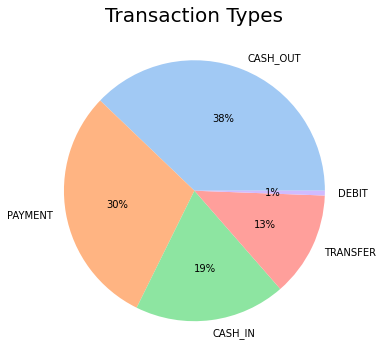

In [ ]:
#Transaction types distribution
data = round((df['type'].value_counts()/len(df))*100, 2).values
labels = round((df['type'].value_counts()/len(df))*100, 2).index

plt.figure(figsize=(12,6))
plt.pie(data, labels=labels, colors=sns.color_palette('pastel'), autopct='%.0f%%')
plt.title('Transaction Types', fontsize=20)
plt.show()

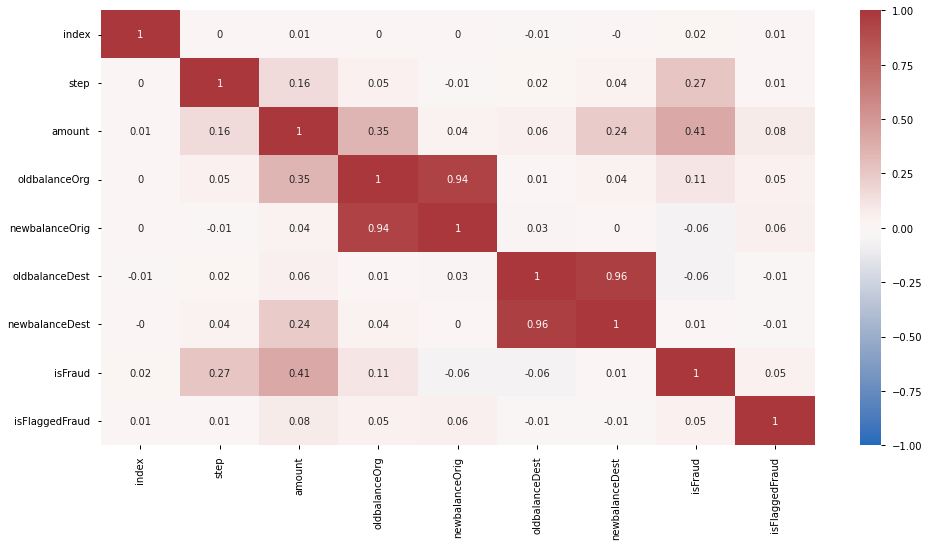

In [ ]:
#check for feature correlations
plt.figure(figsize=(16,8))
sns.heatmap(df.corr().round(2), annot=True, center=0, vmin=-1, vmax=1, cmap='vlag')
plt.show()

# ML Steps
* Drop unnecessary columns ['step', 'nameOrig', 'nameDest', 'isFlaggedFraud']
* define label features and a target feature
* One hot encode categorical feature: 'type'
* Scale and normalise the remaining columns
* Use cross validation to shuffle the data
* Use train test split to divide the data between training and testing dataset
* use column transformers to achive the above
* Use DecisionTree algorithm for prediction
* Run accuracy to check the result

In [5]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [8]:
#  Drop unnecessary columns ['step', 'nameOrig', 'nameDest']
df = df.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
print(df.shape)
df.head(5)

(7175, 8)


,index,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,PAYMENT,8245.19,0.0,0.0,0.00,0.00,0
1,1,CASH_IN,66768.90,5558.0,72326.9,852994.85,786225.94,0
2,2,CASH_OUT,262789.15,0.0,0.0,1112055.66,1374844.81,0
3,3,CASH_OUT,81398.43,41708.0,0.0,333197.80,414596.23,0
4,4,CASH_OUT,250712.64,0.0,0.0,2697076.75,2947789.39,0


In [9]:
#percentage of Fraud Versus Non Fraud samples
print(df['isFraud'].value_counts())
print("\npercentage wise %")
print(np.round(df['isFraud'].value_counts()/df.shape[0],4)*100)

0    6354
1     821
Name: isFraud, dtype: int64

percentage wise %
0    88.56
1    11.44
Name: isFraud, dtype: float64


In [25]:
print(f"The percentage of the Fraud samples is: {[i for i in np.round(df['isFraud'].value_counts()/df.shape[0],4)*100][1]}%")

The percentage of the Fraud samples is: 11.44%


In [27]:
# define independent features and a target feature
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [50]:
#instantiate model, encoders and scalers
clf = DecisionTreeClassifier()
ohe = OneHotEncoder(drop='first')
ss = StandardScaler()
mm = MinMaxScaler()

In [42]:
#check the output of the encoder
print(f"The trasaction categories to be one hot encoded are:\n{X['type'].unique()}\n")
print(df['type'].head(5))
print()
ohe.fit_transform(X[['type']]).toarray()[:5]

The trasaction categories to be one hot encoded are:
['PAYMENT' 'CASH_IN' 'CASH_OUT' 'TRANSFER' 'DEBIT']

0     PAYMENT
1     CASH_IN
2    CASH_OUT
3    CASH_OUT
4    CASH_OUT
Name: type, dtype: object



array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

### Columns Transformers and Pipeline

In [51]:
ct = make_column_transformer((OneHotEncoder(drop='first'), ['type']),
                             (StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                                                 'oldbalanceDest', 'newbalanceDest']),
                             remainder='passthrough',
                            )

In [52]:
pipe = make_pipeline(ct, clf)

In [54]:
#running the model using cross val score 5-fold validation
cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

array([0.97630662, 0.98675958, 0.98954704, 0.99094077, 0.99372822])

In [66]:
print(f"The model accuracy using 5-Fold cross validation is: {round(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()*100, 2)}%")

The model accuracy using 5-Fold cross validation is: 98.75%


In [67]:
#Lets use train_test_split and predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['type']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [69]:
y_pred =  pipe.predict(X_test)

In [80]:
#compare prediction and test data
print(y_pred[:10])
y_test[:10].values

[1 0 0 0 0 0 0 0 0 0]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
print(f"The model accuracy using train_test_split is: {round(accuracy_score(y_test, y_pred, normalize=True)*100, 2)}%")

The model accuracy using train_test_split is: 98.61%
